# Boston Housing Dataset

## About the Dataset

The Boston Housing Dataset contains information collected by the US Census Service in 1970 on various house prices in the area of Boston. The dataset is small in size with only 506 samples and 14 variables. The data gives values for various features of different suburbs of Boston as well as the median-value for homes in each suburb. The features were chosen to reflect various aspects believed to influence houses prices including the structure of the house (age and spaciousness), the quality of the neighborhood, transportation access to employment centers and highways, and pollution.

## Objective

The goals of this assessment are as follows:
 - describe the dataset using descriptive statistics and plots.
 - use inferential statistics to determine whether there is a significant difference in median house prices between houses that    are along the Charles river and those that are not.
 - use keras to create a neural network that can predict the medium house price based on the other variables in the dataset.



## Python Libraries

Python has a large number of libraries which makes it a powerful programming language for analysing data. The libraries that were imported and used in this project were NumPy, Pandas, Matplotlib, Seaborn, Sklearn, Scipy and Keras. 

 - NumPy - an array processing package.
 - Pandas - a data processing library which provides tools for shaping, merging, reshaping, and slicing data sets.
 - Matplotlib - a graphing library to create 2D plots and graphs on a variety of data formats.
 - Seaborn library - a plotting and styling library.
 - Scikit-learn is a library that provides many unsupervised and supervised learning algorithms.
 - SciPy is a library that uses NumPy for more mathematical functions.
 - Keras is an open-source neural-network library written in Python.

In [2]:
# for generating random variables
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for managing data
import pandas as pd

# for plotting
import seaborn as sns 

# for t-tests and ANOVA
import scipy.stats as stats

# for learning algorithms
import sklearn

# to create a neural network
import keras as kr

# for encoding categorical variables.
import sklearn.preprocessing as pre

# for splitting into training and test sets.
import sklearn.model_selection as mod

%matplotlib inline

# to increase the size of the plots as plots are too small otherwise
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Using TensorFlow backend.


## Load the dataset

The Boston Housing dataset can be accessed through the scikit-learn library. The dataset can be directly imported from the scikit-learn library rather than downloading the csv file from an external website. The Boston dataset is made of 506 rows and 14 columns. It is a relatively small, clean and well-known dataset used for machine learning projects.

In [3]:
# load the dataset from the scikit-learn library

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
# print the shape of the dataset and a description of the variables. This shows 506 samples, 14 variables and no missing values.

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create a Panda's Dataframe

The data from the Boston dataset is transferred to a Panda's dataframe to carry out descriptive statistics on the dataset. A Panda's dataframe is a table structure with labelled rows and columns.

In [5]:
# load data into dataframe and print the first 5 rows of data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Median value is a missing variable - the target variable - this needs to be added to the dataframe 
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# check for any missing values in the dataset - a clean dataset is required for analysis
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As we can see there are no missing values in the boston dataset.

In [8]:
#rename the variables to the full variable name to avoid confusion
boston.columns = ['crime_rate', 'large_zones', 'industrial', 'charles_river', 'nitric_oxide', 'rooms', 'old_houses', 'distance', 'highway_access', 'property_tax', 'pupil_teacher_ratio', 'proportion_blacks', 'lower_status', 'median_value']
boston.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Descriptive Statistics

Now that the dataset has been loaded into a Panda's dataframe and the missing variable MEDV has been added, I will analyse the dataset to learn more about what it contains.
The Panda's describe function produces the descriptive statistics on the dataset. The mean, standard deviation, maximum number, minimum number, 25% quartile range, 50% quartile range and 75% quartile range are produced for each of the 14 variables.

In [9]:
# descriptive statistics are obtained using the describe function. Adding the .T swaps the rows and columns.
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
large_zones,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
industrial,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
charles_river,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitric_oxide,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
old_houses,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
highway_access,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
property_tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


It is difficult to obtain a clear picture of the dataset using the basic raw descriptive statistics - it is not very informative in this state. Visualisation tools provide a much better way to analyse the dataset and will give a better understanding of the data.

## Visualisations

The raw descriptive statistics gave all the relevant information on each of the variables in the dataset, however using visual tools such as histograms, boxplots and scatterplots make it easier to visualise the distribution of each of the 14 variables.

Using the Seaborn library I will plot the distribution of the target variable median_value using the histogram and boxplot functions. This target variable is the median-value of houses within a given suburb in $1'000's. I will also plot histograms for all the other variables in order to get an idea about the distribution of these variables too.

I will then calculate the correlation between variables using the corr function in Pandas and plot a heatmap using the Seaborn plotting library.

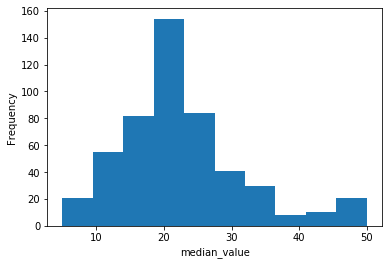

In [10]:
# create a histogram on the 'median_value'
plt.hist(boston['median_value'])
plt.xlabel("median_value")
plt.ylabel("Frequency")
plt.show()

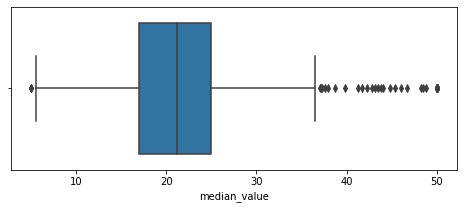

In [11]:
# create a boxplot on variable 'median_value'
plt.figure(figsize=(8,3))
sns.boxplot(boston['median_value'])

### Overview of Visualisation:

Looking at the distribution on the histogram for the median_value it shows a distribution that is skewed right with several outliers. This means it is not normally distributed around the mean, but distributed slightly below the mean. The values are centred around approximately 22,000 and the minimum value is 5,000 and maximum value is 50,000.The boxplot shows a symmetric distribution with one outlier to the left and several to the right.The range of the distribution is 45,000. 

## Correlation

Finding the correlation between variables is a useful way to check for patterns in the dataset. To find the correlation between variables the Pandas .corr() function can be used. The output of each of these correlation functions will fall within the range -1 to +1. 1 indicates variables are positively correlated, -1 indicates variables are negatively correlated and 0 indicates variables are not correlated.
The Pearson correlation coefficient measures the linear relationship between two datasets and requires that each dataset should be normally distributed. However on larger datasets this is not the case.
I am going to calculate the Pearson coefficient on the variables to see what relationships can be found. I will be looking more closely at the relationships with the target value with a value higher than 0.05.

In [12]:
# run the Panda's corr function on the boston dataframe - method Pearson
boston.corr(method='pearson')

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
large_zones,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
industrial,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
charles_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nitric_oxide,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
old_houses,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
highway_access,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
property_tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


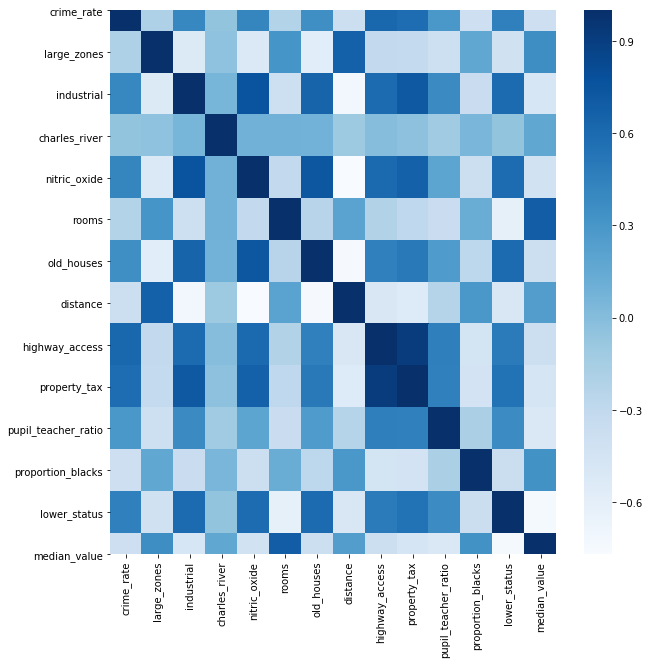

In [13]:
# using Pearson Correlation
plt.figure(figsize=(10,10))

# assign a variable cor
cor = boston.corr(method='pearson')

# create a heatmap in seaborn
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)

In [14]:
#Correlation with target variable
cor_target = abs(cor["median_value"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

rooms                  0.695360
pupil_teacher_ratio    0.507787
lower_status           0.737663
median_value           1.000000
Name: median_value, dtype: float64

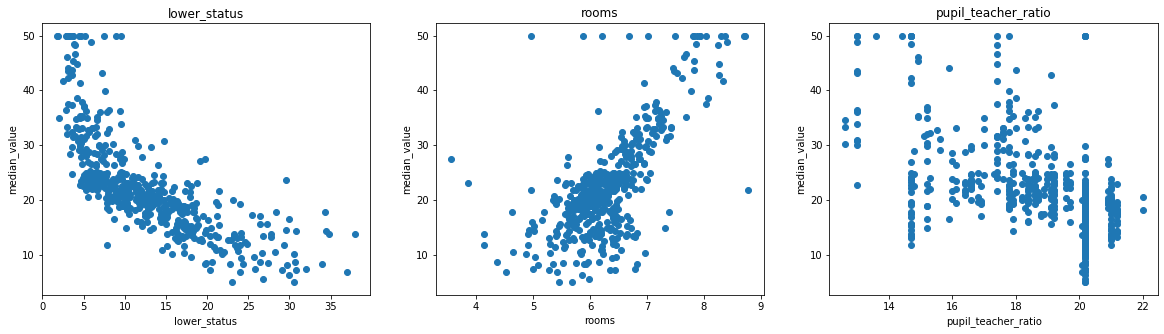

In [15]:
# set plot size
plt.figure(figsize=(20, 5))

# assign variables 
features = ['lower_status', 'rooms', 'pupil_teacher_ratio']
target = boston['median_value']

# plot each feature with target variable
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('median_value')

### Overview of Correlation

Rooms, pupil_teacher_ratio and lower_status are highly correlated to the target variable median_value with values over 0.5. 

By looking at the correlation matrix we can see that rooms (average number of rooms per dwelling) has a strong positive correlation with median_value (0.7) where as lower_status (% lower status of the population) has a high negative correlation with median_value (-0.74). This makes sense as dwellings with more rooms are likely to be higher in value and where there is a lower status in the population it is likely that dwellings would be lower in value in that area. Also in areas where there are less schools and the pupil teacher ratio is higher we would expect that dwellings would be lower in value.
The scatter plots visually show the relationships with the target variable and the high correlation whether negative or positive.
Large zones, charles river and distance are also postively correlated to the target variable. One would assume that houses by the river, more zoned area and distance to employment centres would increase the value of a house.

## Inferential Statistics

Inferential statistics allows predictions to be made from a dataset. They are produced by complex mathematical calculations and allow us to deduce trends and make assumptions and predictions about a population based on a study of a sample taken from it.
In this section inferential statistics will be used to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not along the Charles river.
I will use the three variables that were found to be highly correlated with the median_value - lower_status, rooms and pupil_teacher_ratio and create scatter plots grouped by the charles_river variable. I will then complete an independent t-test on the data.

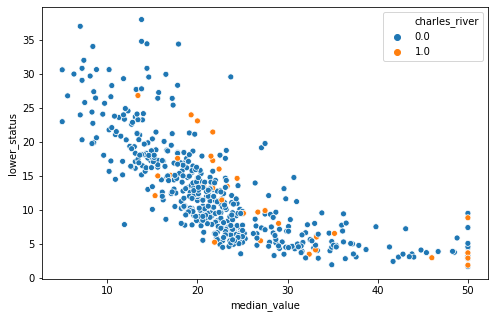

In [16]:
# set plot size
plt.figure(figsize=(8,5))

# create scatter plot
sns.scatterplot(data=boston,x='median_value',y='lower_status', hue='charles_river')

The above scatter plot shows that the higher the lower_status the lower the median_value but it does not give an indication as to whether houses bordering the charles river are higher in value.

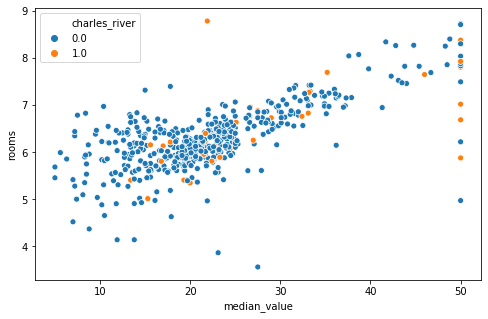

In [17]:
# set plot size
plt.figure(figsize=(8,5))

# create scatter plot
sns.scatterplot(data=boston,x='median_value',y='rooms', hue='charles_river')

Again it can be seen from the above scatter plot that as the number of rooms increase so does median_value. However, it is still not clear whether houses bordering the charles river are more expensive that those that aren't.

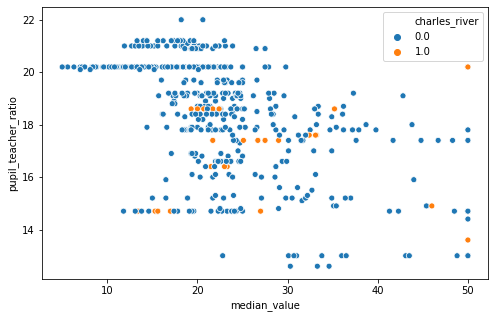

In [18]:
# set plot size
plt.figure(figsize=(8,5))

# create scatter plot
sns.scatterplot(data=boston,x='median_value',y='pupil_teacher_ratio', hue='charles_river')

Again this scatter plot shows the higher the pupil to teacher ratio the lower the value of the home but it does not indicate whether houses are higher in value on the charles river.

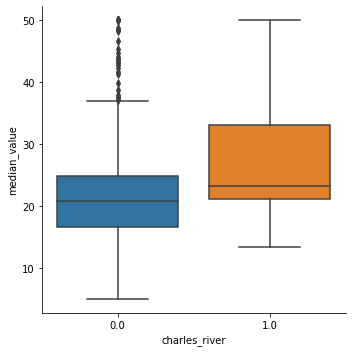

In [19]:
# create a boxplot grouped by charles_river
sns.catplot(data=boston,x='charles_river', y='median_value', kind='box')

The above boxplot diagram shows that houses on the charles river are higher in value that those that aren't. The houses not on the charles river have a median_value that is more widely spread and many outliers. The houses on the charles river have a distribution that is skewed right - the mean is greater than the median. It can also been seen by the descriptive statistics below that we are not working with the same count - 35 homes are bounded by charles river and 471 are not. It does show that the mean and median value is higher for houses bordering charles river.
It is still not clear that bordering the river will have a price benefit on it's own. This assumption can not be made on the diagrams alone.

In [20]:
# calculate an independent ttest on houses that bound the charles river and those that don't
import scipy.stats as ss
chas1=boston[boston['charles_river']==1]['median_value']
chas0=boston[boston['charles_river']==0]['median_value']
ss.ttest_ind(chas1, chas0)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [21]:
# calculate descriptive statistics on houses that do not bound the charles river
chas0.describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: median_value, dtype: float64

In [22]:
# calculate descriptive statistics on houses that do not bound the charles river
chas1.describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: median_value, dtype: float64

### Observations

Null Hypothesis - is the assumption that the average value of the chas1 population (houses that bound the river) is equal to the average value of the chas0 population (houses that don't bound the river).

I set the significance level to 0.05% and conducted an independent t-test on the data.

As the pvalue is less than the significance level of 0.05% the null hypothesis is rejected. There is a significant difference and null hypothesis of equal averages is rejected for an alternative hypothesis.

It can therefore be claimed with certainty that there is a significant difference between house prices bordering the Charles river and those that are not bordering the Charles river.

# Neural Network

Keras is a high-level neural networks API, written in Python. This package will be used to develop a model to predict the median house price based on the other variables in the dataset.
 

### Prepare the Data for the Neural Network

A neural network requires the inputs and outputs to be defined. I defined two variables - inputs and output. The inputs variable contains the 13 variables in the dataset and the output variable is the target variable median_value.

In [23]:
# view first 5 rows of boston dataset
boston.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# create a new dataframe with the input variables for the neural network so I can remove and add as required for testing
inputs = boston[['crime_rate', 'large_zones', 'industrial', 'charles_river', 'nitric_oxide', 'rooms', 'old_houses', 'distance', 'highway_access', 'property_tax', 'pupil_teacher_ratio', 'proportion_blacks', 'lower_status']
]
inputs.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
# create a new variable for the output from the neural network
output = boston['median_value']
output

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: median_value, Length: 506, dtype: float64

## Standardisation

The data in the Boson dataset is not standardized as the variables have different distributions. The normal distribution is one of the most important concepts in statistics since nearly all statistical tests and models require normally distributed data. As a result, the data in the Boston dataset should be standardized using the StandardScaler function in scikit-learn. This is a useful technique where the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1. Standardization is important when comparing variables that have different distributions as it prevents bias.

In [26]:
# import the library
import sklearn.preprocessing as pre

# standarize the inputs
pre.scale(inputs)
inputs_scale=pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
inputs_scale

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [27]:
inputs_scale.mean().round(2)

crime_rate            -0.0
large_zones            0.0
industrial             0.0
charles_river         -0.0
nitric_oxide          -0.0
rooms                 -0.0
old_houses            -0.0
distance               0.0
highway_access         0.0
property_tax          -0.0
pupil_teacher_ratio    0.0
proportion_blacks     -0.0
lower_status          -0.0
dtype: float64

It can be seen from running the code inputs_scale.mean().round(2) that the mean is now zero.

In [28]:
inputs_scale.std().round(2)

crime_rate             1.0
large_zones            1.0
industrial             1.0
charles_river          1.0
nitric_oxide           1.0
rooms                  1.0
old_houses             1.0
distance               1.0
highway_access         1.0
property_tax           1.0
pupil_teacher_ratio    1.0
proportion_blacks      1.0
lower_status           1.0
dtype: float64

It can be seen from running the code inputs_scale.std().round(2) that the standard deviation is now one.

### Fitting and Transforming

The scaler.transform function will allow any new rows that are added to the dataset to be transformed or standardized in the same way as the rest of the dataset.

In [29]:
scaler = pre.StandardScaler()
scaler.fit(inputs)
scaler.mean_, scaler.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [30]:
# this allows us to transform any new values that are added to the dataset
inputs_scale = pd.DataFrame(scaler.transform(inputs), columns=inputs.columns)
inputs_scale

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


### Split the Data into Train and Test Data

In [31]:
inputs_scale_train, inputs_scale_test, output_train, output_test = mod.train_test_split(inputs_scale, output, test_size=0.2)

## Create the Neural Network Model

Now that the input variables have been standardized I can now build the neural network. I will use a sequential model.

I built a model with two hidden layers, with 128 and 64 neurons respectively with a ReLU activation function. The final output layer uses a linear activation function as we are outputting a single variable. I used the Adam optimizer mean squared error loss function and "mean absolute percentage error" as the metric for validation.

The whole prcess of training the data will be in batches of 10 and will be repeated 1000 times. At the end of each epoch, the model will comput and print the performance metrics.

The model design took a lot of trial and error. I tested a number of different models but found that this design performed the best. 

Epoch 1/2000
506/506 [==============================] - 2s 4ms/step - loss: 440.4755 - mean_absolute_percentage_error: 79.5723
Epoch 2/2000
506/506 [==============================] - 0s 468us/step - loss: 94.3295 - mean_absolute_percentage_error: 34.7582
Epoch 3/2000
506/506 [==============================] - 0s 601us/step - loss: 28.8338 - mean_absolute_percentage_error: 20.0684
Epoch 4/2000
506/506 [==============================] - 0s 439us/step - loss: 22.3259 - mean_absolute_percentage_error: 17.5844
Epoch 5/2000
506/506 [==============================] - 0s 439us/step - loss: 19.0082 - mean_absolute_percentage_error: 15.5335
Epoch 6/2000
506/506 [==============================] - 0s 403us/step - loss: 17.1659 - mean_absolute_percentage_error: 14.3295
Epoch 7/2000
506/506 [==============================] - 0s 358us/step - loss: 15.9837 - mean_absolute_percentage_error: 14.0177
Epoch 8/2000
506/506 [==============================] - 0s 496us/step - loss: 14.7575 - mean_absolute_per

506/506 [==============================] - 0s 437us/step - loss: 4.8671 - mean_absolute_percentage_error: 8.0934
Epoch 66/2000
506/506 [==============================] - 0s 356us/step - loss: 4.8356 - mean_absolute_percentage_error: 8.1765
Epoch 67/2000
506/506 [==============================] - 0s 382us/step - loss: 4.9645 - mean_absolute_percentage_error: 8.3485
Epoch 68/2000
506/506 [==============================] - 0s 403us/step - loss: 4.9632 - mean_absolute_percentage_error: 8.6451
Epoch 69/2000
506/506 [==============================] - 0s 421us/step - loss: 4.6581 - mean_absolute_percentage_error: 7.9138
Epoch 70/2000
506/506 [==============================] - 0s 334us/step - loss: 4.5794 - mean_absolute_percentage_error: 8.0864
Epoch 71/2000
506/506 [==============================] - 0s 387us/step - loss: 4.5624 - mean_absolute_percentage_error: 7.9742
Epoch 72/2000
506/506 [==============================] - 0s 314us/step - loss: 4.5652 - mean_absolute_percentage_error: 8.170

506/506 [==============================] - 0s 486us/step - loss: 2.4253 - mean_absolute_percentage_error: 5.8698
Epoch 129/2000
506/506 [==============================] - 0s 383us/step - loss: 2.4033 - mean_absolute_percentage_error: 5.9273
Epoch 130/2000
506/506 [==============================] - 0s 453us/step - loss: 2.5256 - mean_absolute_percentage_error: 6.1724
Epoch 131/2000
506/506 [==============================] - 0s 413us/step - loss: 2.3894 - mean_absolute_percentage_error: 6.2268
Epoch 132/2000
506/506 [==============================] - 0s 385us/step - loss: 2.4854 - mean_absolute_percentage_error: 6.0674
Epoch 133/2000
506/506 [==============================] - 0s 401us/step - loss: 2.3568 - mean_absolute_percentage_error: 5.8999
Epoch 134/2000
506/506 [==============================] - 0s 407us/step - loss: 2.3746 - mean_absolute_percentage_error: 6.0591
Epoch 135/2000
506/506 [==============================] - 0s 411us/step - loss: 2.1813 - mean_absolute_percentage_error

506/506 [==============================] - 0s 486us/step - loss: 1.4654 - mean_absolute_percentage_error: 4.5569
Epoch 192/2000
506/506 [==============================] - 0s 423us/step - loss: 1.6352 - mean_absolute_percentage_error: 4.8766
Epoch 193/2000
506/506 [==============================] - 0s 520us/step - loss: 1.4323 - mean_absolute_percentage_error: 4.5497
Epoch 194/2000
506/506 [==============================] - 0s 573us/step - loss: 1.3993 - mean_absolute_percentage_error: 4.4613
Epoch 195/2000
506/506 [==============================] - 0s 619us/step - loss: 1.5091 - mean_absolute_percentage_error: 4.6847
Epoch 196/2000
506/506 [==============================] - 0s 421us/step - loss: 1.4276 - mean_absolute_percentage_error: 4.5331
Epoch 197/2000
506/506 [==============================] - 0s 352us/step - loss: 1.3351 - mean_absolute_percentage_error: 4.3390
Epoch 198/2000
506/506 [==============================] - 0s 761us/step - loss: 1.3653 - mean_absolute_percentage_error

506/506 [==============================] - 0s 441us/step - loss: 1.0418 - mean_absolute_percentage_error: 3.7075
Epoch 256/2000
506/506 [==============================] - 0s 405us/step - loss: 1.1415 - mean_absolute_percentage_error: 4.0250
Epoch 257/2000
506/506 [==============================] - 0s 380us/step - loss: 1.0943 - mean_absolute_percentage_error: 4.0626
Epoch 258/2000
506/506 [==============================] - 0s 387us/step - loss: 1.0171 - mean_absolute_percentage_error: 4.0564
Epoch 259/2000
506/506 [==============================] - 0s 393us/step - loss: 1.0374 - mean_absolute_percentage_error: 3.9770
Epoch 260/2000
506/506 [==============================] - 0s 399us/step - loss: 0.9694 - mean_absolute_percentage_error: 3.7233
Epoch 261/2000
506/506 [==============================] - 0s 409us/step - loss: 1.2364 - mean_absolute_percentage_error: 4.3475
Epoch 262/2000
506/506 [==============================] - 0s 411us/step - loss: 0.9830 - mean_absolute_percentage_error

506/506 [==============================] - 0s 480us/step - loss: 0.8725 - mean_absolute_percentage_error: 3.4596
Epoch 319/2000
506/506 [==============================] - 0s 417us/step - loss: 0.6911 - mean_absolute_percentage_error: 3.0709
Epoch 320/2000
506/506 [==============================] - 0s 593us/step - loss: 0.6784 - mean_absolute_percentage_error: 3.0634
Epoch 321/2000
506/506 [==============================] - 0s 366us/step - loss: 0.9225 - mean_absolute_percentage_error: 3.4607
Epoch 322/2000
506/506 [==============================] - 0s 360us/step - loss: 0.8559 - mean_absolute_percentage_error: 3.59710s - loss: 0.9116 - mean_absolute_percentage_error: 3.
Epoch 323/2000
506/506 [==============================] - 0s 344us/step - loss: 0.7289 - mean_absolute_percentage_error: 3.2357
Epoch 324/2000
506/506 [==============================] - 0s 362us/step - loss: 0.7751 - mean_absolute_percentage_error: 3.3907
Epoch 325/2000
506/506 [==============================] - 0s 382u

506/506 [==============================] - 0s 409us/step - loss: 0.5408 - mean_absolute_percentage_error: 2.7380
Epoch 382/2000
506/506 [==============================] - 0s 306us/step - loss: 0.5985 - mean_absolute_percentage_error: 3.1293
Epoch 383/2000
506/506 [==============================] - 0s 300us/step - loss: 0.6818 - mean_absolute_percentage_error: 3.2212
Epoch 384/2000
506/506 [==============================] - 0s 330us/step - loss: 0.6649 - mean_absolute_percentage_error: 3.2054
Epoch 385/2000
506/506 [==============================] - 0s 405us/step - loss: 0.5989 - mean_absolute_percentage_error: 3.0475
Epoch 386/2000
506/506 [==============================] - 0s 401us/step - loss: 0.5454 - mean_absolute_percentage_error: 2.8991
Epoch 387/2000
506/506 [==============================] - 0s 389us/step - loss: 0.5723 - mean_absolute_percentage_error: 2.8346
Epoch 388/2000
506/506 [==============================] - 0s 389us/step - loss: 0.6203 - mean_absolute_percentage_error

506/506 [==============================] - 0s 380us/step - loss: 0.6657 - mean_absolute_percentage_error: 3.1172
Epoch 446/2000
506/506 [==============================] - 0s 354us/step - loss: 0.4633 - mean_absolute_percentage_error: 2.5927
Epoch 447/2000
506/506 [==============================] - 0s 368us/step - loss: 0.5104 - mean_absolute_percentage_error: 2.7112
Epoch 448/2000
506/506 [==============================] - 0s 358us/step - loss: 0.5277 - mean_absolute_percentage_error: 2.7320
Epoch 449/2000
506/506 [==============================] - 0s 565us/step - loss: 0.4800 - mean_absolute_percentage_error: 2.7428
Epoch 450/2000
506/506 [==============================] - 0s 508us/step - loss: 0.4437 - mean_absolute_percentage_error: 2.6266
Epoch 451/2000
506/506 [==============================] - 0s 431us/step - loss: 0.4657 - mean_absolute_percentage_error: 2.7066
Epoch 452/2000
506/506 [==============================] - 0s 455us/step - loss: 0.4241 - mean_absolute_percentage_error

506/506 [==============================] - 0s 415us/step - loss: 0.2999 - mean_absolute_percentage_error: 1.9659
Epoch 509/2000
506/506 [==============================] - 0s 334us/step - loss: 0.3686 - mean_absolute_percentage_error: 2.2486
Epoch 510/2000
506/506 [==============================] - 0s 380us/step - loss: 0.3204 - mean_absolute_percentage_error: 2.1372
Epoch 511/2000
506/506 [==============================] - 0s 429us/step - loss: 0.3303 - mean_absolute_percentage_error: 2.0870
Epoch 512/2000
506/506 [==============================] - 0s 431us/step - loss: 0.4236 - mean_absolute_percentage_error: 2.4848
Epoch 513/2000
506/506 [==============================] - 0s 514us/step - loss: 0.5078 - mean_absolute_percentage_error: 2.7917
Epoch 514/2000
506/506 [==============================] - 0s 397us/step - loss: 0.5466 - mean_absolute_percentage_error: 3.0849
Epoch 515/2000
506/506 [==============================] - 0s 437us/step - loss: 0.5449 - mean_absolute_percentage_error

506/506 [==============================] - 0s 382us/step - loss: 0.3195 - mean_absolute_percentage_error: 2.1117
Epoch 572/2000
506/506 [==============================] - 0s 326us/step - loss: 0.2871 - mean_absolute_percentage_error: 1.9500
Epoch 573/2000
506/506 [==============================] - 0s 387us/step - loss: 0.3189 - mean_absolute_percentage_error: 2.3025
Epoch 574/2000
506/506 [==============================] - 0s 403us/step - loss: 0.3435 - mean_absolute_percentage_error: 2.2901
Epoch 575/2000
506/506 [==============================] - 0s 411us/step - loss: 0.3381 - mean_absolute_percentage_error: 2.3017
Epoch 576/2000
506/506 [==============================] - 0s 384us/step - loss: 0.3228 - mean_absolute_percentage_error: 2.2006
Epoch 577/2000
506/506 [==============================] - 0s 415us/step - loss: 0.3938 - mean_absolute_percentage_error: 2.4363
Epoch 578/2000
506/506 [==============================] - 0s 393us/step - loss: 0.4210 - mean_absolute_percentage_error

506/506 [==============================] - 0s 480us/step - loss: 0.2317 - mean_absolute_percentage_error: 1.7903
Epoch 636/2000
506/506 [==============================] - 0s 366us/step - loss: 0.3326 - mean_absolute_percentage_error: 2.3656
Epoch 637/2000
506/506 [==============================] - 0s 439us/step - loss: 0.3883 - mean_absolute_percentage_error: 2.4340
Epoch 638/2000
506/506 [==============================] - 0s 403us/step - loss: 0.5327 - mean_absolute_percentage_error: 2.6361
Epoch 639/2000
506/506 [==============================] - 0s 413us/step - loss: 0.4360 - mean_absolute_percentage_error: 2.4733
Epoch 640/2000
506/506 [==============================] - 0s 384us/step - loss: 0.4136 - mean_absolute_percentage_error: 2.4811
Epoch 641/2000
506/506 [==============================] - 0s 415us/step - loss: 0.3589 - mean_absolute_percentage_error: 2.3336
Epoch 642/2000
506/506 [==============================] - 0s 413us/step - loss: 0.2915 - mean_absolute_percentage_error

506/506 [==============================] - 0s 427us/step - loss: 0.2343 - mean_absolute_percentage_error: 1.7695
Epoch 700/2000
506/506 [==============================] - 0s 698us/step - loss: 0.4139 - mean_absolute_percentage_error: 2.3200
Epoch 701/2000
506/506 [==============================] - 0s 370us/step - loss: 0.6793 - mean_absolute_percentage_error: 3.2530
Epoch 702/2000
506/506 [==============================] - 0s 589us/step - loss: 0.4706 - mean_absolute_percentage_error: 2.5598
Epoch 703/2000
506/506 [==============================] - 0s 445us/step - loss: 0.6118 - mean_absolute_percentage_error: 3.0715
Epoch 704/2000
506/506 [==============================] - 0s 431us/step - loss: 0.4179 - mean_absolute_percentage_error: 2.5950
Epoch 705/2000
506/506 [==============================] - 0s 791us/step - loss: 0.2782 - mean_absolute_percentage_error: 2.1464
Epoch 706/2000
506/506 [==============================] - 0s 348us/step - loss: 0.2317 - mean_absolute_percentage_error

506/506 [==============================] - 0s 502us/step - loss: 0.3647 - mean_absolute_percentage_error: 2.2522
Epoch 763/2000
506/506 [==============================] - 0s 395us/step - loss: 0.4134 - mean_absolute_percentage_error: 2.4821
Epoch 764/2000
506/506 [==============================] - 0s 403us/step - loss: 0.6563 - mean_absolute_percentage_error: 3.4798
Epoch 765/2000
506/506 [==============================] - 0s 405us/step - loss: 0.6236 - mean_absolute_percentage_error: 3.1346
Epoch 766/2000
506/506 [==============================] - 0s 393us/step - loss: 0.3718 - mean_absolute_percentage_error: 2.3733
Epoch 767/2000
506/506 [==============================] - 0s 451us/step - loss: 0.3146 - mean_absolute_percentage_error: 2.1455
Epoch 768/2000
506/506 [==============================] - 0s 415us/step - loss: 0.3799 - mean_absolute_percentage_error: 2.3441
Epoch 769/2000
506/506 [==============================] - 0s 427us/step - loss: 0.3118 - mean_absolute_percentage_error

506/506 [==============================] - 0s 500us/step - loss: 0.2191 - mean_absolute_percentage_error: 1.7882
Epoch 826/2000
506/506 [==============================] - 0s 490us/step - loss: 0.1856 - mean_absolute_percentage_error: 1.7146
Epoch 827/2000
506/506 [==============================] - 0s 476us/step - loss: 0.3980 - mean_absolute_percentage_error: 2.4027
Epoch 828/2000
506/506 [==============================] - 0s 451us/step - loss: 0.3061 - mean_absolute_percentage_error: 2.1315
Epoch 829/2000
506/506 [==============================] - 0s 449us/step - loss: 0.4107 - mean_absolute_percentage_error: 2.5334
Epoch 830/2000
506/506 [==============================] - 0s 506us/step - loss: 0.3285 - mean_absolute_percentage_error: 2.2413
Epoch 831/2000
506/506 [==============================] - 0s 387us/step - loss: 0.2183 - mean_absolute_percentage_error: 1.7728
Epoch 832/2000
506/506 [==============================] - 0s 393us/step - loss: 0.2711 - mean_absolute_percentage_error

506/506 [==============================] - 0s 494us/step - loss: 0.3070 - mean_absolute_percentage_error: 2.0632
Epoch 890/2000
506/506 [==============================] - 0s 439us/step - loss: 0.6810 - mean_absolute_percentage_error: 3.2488
Epoch 891/2000
506/506 [==============================] - 0s 484us/step - loss: 0.4136 - mean_absolute_percentage_error: 2.5566
Epoch 892/2000
506/506 [==============================] - 0s 437us/step - loss: 0.2378 - mean_absolute_percentage_error: 1.8243
Epoch 893/2000
506/506 [==============================] - 0s 524us/step - loss: 0.2186 - mean_absolute_percentage_error: 1.7926
Epoch 894/2000
506/506 [==============================] - 0s 413us/step - loss: 0.2341 - mean_absolute_percentage_error: 1.9126
Epoch 895/2000
506/506 [==============================] - 0s 429us/step - loss: 0.1846 - mean_absolute_percentage_error: 1.6064
Epoch 896/2000
506/506 [==============================] - 0s 411us/step - loss: 0.1893 - mean_absolute_percentage_error

506/506 [==============================] - 0s 536us/step - loss: 0.2428 - mean_absolute_percentage_error: 1.9216
Epoch 953/2000
506/506 [==============================] - 0s 411us/step - loss: 0.2532 - mean_absolute_percentage_error: 1.9442
Epoch 954/2000
506/506 [==============================] - 0s 409us/step - loss: 0.1488 - mean_absolute_percentage_error: 1.4947
Epoch 955/2000
506/506 [==============================] - 0s 397us/step - loss: 0.1399 - mean_absolute_percentage_error: 1.4487
Epoch 956/2000
506/506 [==============================] - 0s 415us/step - loss: 0.1108 - mean_absolute_percentage_error: 1.2696
Epoch 957/2000
506/506 [==============================] - 0s 306us/step - loss: 0.1082 - mean_absolute_percentage_error: 1.2551
Epoch 958/2000
506/506 [==============================] - 0s 312us/step - loss: 0.1183 - mean_absolute_percentage_error: 1.3150
Epoch 959/2000
506/506 [==============================] - 0s 407us/step - loss: 0.1653 - mean_absolute_percentage_error

506/506 [==============================] - 0s 480us/step - loss: 0.2101 - mean_absolute_percentage_error: 1.8141
Epoch 1016/2000
506/506 [==============================] - 0s 514us/step - loss: 0.1997 - mean_absolute_percentage_error: 1.7371
Epoch 1017/2000
506/506 [==============================] - 0s 415us/step - loss: 0.2500 - mean_absolute_percentage_error: 1.8906
Epoch 1018/2000
506/506 [==============================] - 0s 409us/step - loss: 0.4639 - mean_absolute_percentage_error: 2.4114
Epoch 1019/2000
506/506 [==============================] - 0s 401us/step - loss: 0.2970 - mean_absolute_percentage_error: 2.0452
Epoch 1020/2000
506/506 [==============================] - 0s 415us/step - loss: 0.2121 - mean_absolute_percentage_error: 1.8117
Epoch 1021/2000
506/506 [==============================] - 0s 310us/step - loss: 0.1677 - mean_absolute_percentage_error: 1.5869
Epoch 1022/2000
506/506 [==============================] - 0s 354us/step - loss: 0.1459 - mean_absolute_percentag

506/506 [==============================] - 0s 387us/step - loss: 0.3445 - mean_absolute_percentage_error: 2.1280
Epoch 1079/2000
506/506 [==============================] - 0s 346us/step - loss: 0.3782 - mean_absolute_percentage_error: 2.3605
Epoch 1080/2000
506/506 [==============================] - 0s 467us/step - loss: 0.4013 - mean_absolute_percentage_error: 2.4524
Epoch 1081/2000
506/506 [==============================] - 0s 427us/step - loss: 0.2842 - mean_absolute_percentage_error: 1.9944
Epoch 1082/2000
506/506 [==============================] - 0s 514us/step - loss: 0.1756 - mean_absolute_percentage_error: 1.6110
Epoch 1083/2000
506/506 [==============================] - 0s 395us/step - loss: 0.1857 - mean_absolute_percentage_error: 1.5834
Epoch 1084/2000
506/506 [==============================] - 0s 409us/step - loss: 0.1560 - mean_absolute_percentage_error: 1.5668
Epoch 1085/2000
506/506 [==============================] - 0s 397us/step - loss: 0.1613 - mean_absolute_percentag

506/506 [==============================] - 0s 389us/step - loss: 0.1781 - mean_absolute_percentage_error: 1.6989
Epoch 1141/2000
506/506 [==============================] - 0s 350us/step - loss: 0.1433 - mean_absolute_percentage_error: 1.5970
Epoch 1142/2000
506/506 [==============================] - 0s 411us/step - loss: 0.4044 - mean_absolute_percentage_error: 2.3537
Epoch 1143/2000
506/506 [==============================] - 0s 384us/step - loss: 0.4469 - mean_absolute_percentage_error: 2.7008
Epoch 1144/2000
506/506 [==============================] - 0s 389us/step - loss: 0.9353 - mean_absolute_percentage_error: 3.7960
Epoch 1145/2000
506/506 [==============================] - 0s 441us/step - loss: 0.7850 - mean_absolute_percentage_error: 3.3532
Epoch 1146/2000
506/506 [==============================] - 0s 484us/step - loss: 0.3562 - mean_absolute_percentage_error: 2.3611
Epoch 1147/2000
506/506 [==============================] - 0s 409us/step - loss: 0.5687 - mean_absolute_percentag

506/506 [==============================] - 0s 401us/step - loss: 0.1527 - mean_absolute_percentage_error: 1.4507
Epoch 1204/2000
506/506 [==============================] - 0s 342us/step - loss: 0.3304 - mean_absolute_percentage_error: 2.3656
Epoch 1205/2000
506/506 [==============================] - 0s 488us/step - loss: 0.3716 - mean_absolute_percentage_error: 2.30510s - loss: 0.5446 - mean_absolute_percentage_error
Epoch 1206/2000
506/506 [==============================] - 0s 395us/step - loss: 0.4034 - mean_absolute_percentage_error: 2.4003
Epoch 1207/2000
506/506 [==============================] - 0s 423us/step - loss: 0.2255 - mean_absolute_percentage_error: 1.8734
Epoch 1208/2000
506/506 [==============================] - 0s 411us/step - loss: 0.4038 - mean_absolute_percentage_error: 2.3786
Epoch 1209/2000
506/506 [==============================] - 0s 437us/step - loss: 0.2710 - mean_absolute_percentage_error: 2.0740
Epoch 1210/2000
506/506 [==============================] - 0s 4

506/506 [==============================] - 0s 488us/step - loss: 0.2772 - mean_absolute_percentage_error: 2.0909
Epoch 1266/2000
506/506 [==============================] - 0s 508us/step - loss: 0.1791 - mean_absolute_percentage_error: 1.7087
Epoch 1267/2000
506/506 [==============================] - 0s 437us/step - loss: 0.1436 - mean_absolute_percentage_error: 1.4624
Epoch 1268/2000
506/506 [==============================] - 0s 554us/step - loss: 0.2078 - mean_absolute_percentage_error: 1.6786
Epoch 1269/2000
506/506 [==============================] - 0s 433us/step - loss: 0.2400 - mean_absolute_percentage_error: 1.7939
Epoch 1270/2000
506/506 [==============================] - 0s 318us/step - loss: 0.4638 - mean_absolute_percentage_error: 2.5471
Epoch 1271/2000
506/506 [==============================] - 0s 348us/step - loss: 0.8147 - mean_absolute_percentage_error: 3.4920
Epoch 1272/2000
506/506 [==============================] - 0s 395us/step - loss: 0.3561 - mean_absolute_percentag

506/506 [==============================] - 0s 684us/step - loss: 0.2578 - mean_absolute_percentage_error: 1.9012
Epoch 1328/2000
506/506 [==============================] - 0s 455us/step - loss: 0.1895 - mean_absolute_percentage_error: 1.6783
Epoch 1329/2000
506/506 [==============================] - 0s 413us/step - loss: 0.1440 - mean_absolute_percentage_error: 1.4478
Epoch 1330/2000
506/506 [==============================] - 0s 387us/step - loss: 0.1146 - mean_absolute_percentage_error: 1.1840
Epoch 1331/2000
506/506 [==============================] - 0s 399us/step - loss: 0.1727 - mean_absolute_percentage_error: 1.6660
Epoch 1332/2000
506/506 [==============================] - 0s 425us/step - loss: 0.1335 - mean_absolute_percentage_error: 1.3583
Epoch 1333/2000
506/506 [==============================] - 0s 429us/step - loss: 0.1291 - mean_absolute_percentage_error: 1.3936
Epoch 1334/2000
506/506 [==============================] - 0s 417us/step - loss: 0.1005 - mean_absolute_percentag

506/506 [==============================] - 0s 385us/step - loss: 0.1673 - mean_absolute_percentage_error: 1.5310
Epoch 1391/2000
506/506 [==============================] - 0s 512us/step - loss: 0.1763 - mean_absolute_percentage_error: 1.6209
Epoch 1392/2000
506/506 [==============================] - 0s 451us/step - loss: 0.1592 - mean_absolute_percentage_error: 1.5794
Epoch 1393/2000
506/506 [==============================] - 0s 451us/step - loss: 0.1834 - mean_absolute_percentage_error: 1.6115
Epoch 1394/2000
506/506 [==============================] - 0s 557us/step - loss: 0.1305 - mean_absolute_percentage_error: 1.3938
Epoch 1395/2000
506/506 [==============================] - 0s 476us/step - loss: 0.1423 - mean_absolute_percentage_error: 1.4071
Epoch 1396/2000
506/506 [==============================] - 0s 451us/step - loss: 0.3593 - mean_absolute_percentage_error: 2.2206
Epoch 1397/2000
506/506 [==============================] - 0s 407us/step - loss: 0.6406 - mean_absolute_percentag

506/506 [==============================] - 0s 478us/step - loss: 0.1626 - mean_absolute_percentage_error: 1.5711
Epoch 1452/2000
506/506 [==============================] - 0s 441us/step - loss: 0.2075 - mean_absolute_percentage_error: 1.7302
Epoch 1453/2000
506/506 [==============================] - 0s 472us/step - loss: 0.4652 - mean_absolute_percentage_error: 2.6043
Epoch 1454/2000
506/506 [==============================] - 0s 550us/step - loss: 0.3827 - mean_absolute_percentage_error: 2.4441
Epoch 1455/2000
506/506 [==============================] - 0s 524us/step - loss: 0.3667 - mean_absolute_percentage_error: 2.3818
Epoch 1456/2000
506/506 [==============================] - 0s 435us/step - loss: 0.6292 - mean_absolute_percentage_error: 3.2702
Epoch 1457/2000
506/506 [==============================] - 0s 443us/step - loss: 0.3998 - mean_absolute_percentage_error: 2.5003
Epoch 1458/2000
506/506 [==============================] - 0s 555us/step - loss: 0.3440 - mean_absolute_percentag

506/506 [==============================] - 0s 488us/step - loss: 0.1440 - mean_absolute_percentage_error: 1.4873
Epoch 1515/2000
506/506 [==============================] - 0s 409us/step - loss: 0.1176 - mean_absolute_percentage_error: 1.2941
Epoch 1516/2000
506/506 [==============================] - 0s 389us/step - loss: 0.1932 - mean_absolute_percentage_error: 1.5364
Epoch 1517/2000
506/506 [==============================] - 0s 433us/step - loss: 0.1420 - mean_absolute_percentage_error: 1.4373
Epoch 1518/2000
506/506 [==============================] - 0s 391us/step - loss: 0.0945 - mean_absolute_percentage_error: 1.1746
Epoch 1519/2000
506/506 [==============================] - 0s 417us/step - loss: 0.1011 - mean_absolute_percentage_error: 1.1275
Epoch 1520/2000
506/506 [==============================] - 0s 431us/step - loss: 0.0762 - mean_absolute_percentage_error: 1.0202
Epoch 1521/2000
506/506 [==============================] - 0s 478us/step - loss: 0.1163 - mean_absolute_percentag

506/506 [==============================] - 0s 415us/step - loss: 0.1792 - mean_absolute_percentage_error: 1.5763
Epoch 1578/2000
506/506 [==============================] - 0s 382us/step - loss: 0.1526 - mean_absolute_percentage_error: 1.6202
Epoch 1579/2000
506/506 [==============================] - 0s 437us/step - loss: 0.1817 - mean_absolute_percentage_error: 1.7235
Epoch 1580/2000
506/506 [==============================] - 0s 441us/step - loss: 0.1127 - mean_absolute_percentage_error: 1.3588
Epoch 1581/2000
506/506 [==============================] - 0s 451us/step - loss: 0.0899 - mean_absolute_percentage_error: 1.1622
Epoch 1582/2000
506/506 [==============================] - 0s 480us/step - loss: 0.1192 - mean_absolute_percentage_error: 1.3552
Epoch 1583/2000
506/506 [==============================] - 0s 399us/step - loss: 0.0863 - mean_absolute_percentage_error: 1.1612
Epoch 1584/2000
506/506 [==============================] - 0s 469us/step - loss: 0.0801 - mean_absolute_percentag

506/506 [==============================] - 0s 518us/step - loss: 0.1576 - mean_absolute_percentage_error: 1.5302
Epoch 1640/2000
506/506 [==============================] - 0s 415us/step - loss: 0.1225 - mean_absolute_percentage_error: 1.3678
Epoch 1641/2000
506/506 [==============================] - 0s 433us/step - loss: 0.1329 - mean_absolute_percentage_error: 1.3793
Epoch 1642/2000
506/506 [==============================] - 0s 451us/step - loss: 0.2270 - mean_absolute_percentage_error: 1.8992
Epoch 1643/2000
506/506 [==============================] - 0s 478us/step - loss: 0.2420 - mean_absolute_percentage_error: 1.8841
Epoch 1644/2000
506/506 [==============================] - 0s 409us/step - loss: 0.2086 - mean_absolute_percentage_error: 1.9380
Epoch 1645/2000
506/506 [==============================] - 0s 350us/step - loss: 0.1468 - mean_absolute_percentage_error: 1.4938
Epoch 1646/2000
506/506 [==============================] - 0s 437us/step - loss: 0.1028 - mean_absolute_percentag

506/506 [==============================] - 0s 445us/step - loss: 0.1949 - mean_absolute_percentage_error: 1.6240
Epoch 1703/2000
506/506 [==============================] - 0s 512us/step - loss: 0.1536 - mean_absolute_percentage_error: 1.5450
Epoch 1704/2000
506/506 [==============================] - 0s 427us/step - loss: 0.1564 - mean_absolute_percentage_error: 1.4871
Epoch 1705/2000
506/506 [==============================] - 0s 413us/step - loss: 0.1519 - mean_absolute_percentage_error: 1.3941
Epoch 1706/2000
506/506 [==============================] - 0s 429us/step - loss: 0.1074 - mean_absolute_percentage_error: 1.2153
Epoch 1707/2000
506/506 [==============================] - 0s 439us/step - loss: 0.1063 - mean_absolute_percentage_error: 1.2994
Epoch 1708/2000
506/506 [==============================] - 0s 413us/step - loss: 0.0880 - mean_absolute_percentage_error: 1.1497
Epoch 1709/2000
506/506 [==============================] - 0s 455us/step - loss: 0.1023 - mean_absolute_percentag

506/506 [==============================] - 0s 506us/step - loss: 0.1360 - mean_absolute_percentage_error: 1.4092
Epoch 1766/2000
506/506 [==============================] - 0s 397us/step - loss: 0.1484 - mean_absolute_percentage_error: 1.4254
Epoch 1767/2000
506/506 [==============================] - 0s 427us/step - loss: 0.1684 - mean_absolute_percentage_error: 1.5552
Epoch 1768/2000
506/506 [==============================] - 0s 427us/step - loss: 0.1569 - mean_absolute_percentage_error: 1.5385
Epoch 1769/2000
506/506 [==============================] - 0s 478us/step - loss: 0.1277 - mean_absolute_percentage_error: 1.47400s - loss: 0.1545 - mean_absolute_percentage_error: 
Epoch 1770/2000
506/506 [==============================] - 0s 559us/step - loss: 0.1020 - mean_absolute_percentage_error: 1.3244
Epoch 1771/2000
506/506 [==============================] - 0s 482us/step - loss: 0.1063 - mean_absolute_percentage_error: 1.2579
Epoch 1772/2000
506/506 [==============================] - 0s

506/506 [==============================] - 0s 474us/step - loss: 0.0882 - mean_absolute_percentage_error: 1.2021
Epoch 1827/2000
506/506 [==============================] - 0s 411us/step - loss: 0.1248 - mean_absolute_percentage_error: 1.4645
Epoch 1828/2000
506/506 [==============================] - 0s 395us/step - loss: 0.1163 - mean_absolute_percentage_error: 1.3234
Epoch 1829/2000
506/506 [==============================] - 0s 431us/step - loss: 0.1081 - mean_absolute_percentage_error: 1.2569
Epoch 1830/2000
506/506 [==============================] - 0s 433us/step - loss: 0.1111 - mean_absolute_percentage_error: 1.2700
Epoch 1831/2000
506/506 [==============================] - 0s 480us/step - loss: 0.1212 - mean_absolute_percentage_error: 1.3780
Epoch 1832/2000
506/506 [==============================] - 0s 516us/step - loss: 0.1304 - mean_absolute_percentage_error: 1.3851
Epoch 1833/2000
506/506 [==============================] - 0s 360us/step - loss: 0.2841 - mean_absolute_percentag

506/506 [==============================] - 0s 445us/step - loss: 0.1832 - mean_absolute_percentage_error: 1.7101
Epoch 1890/2000
506/506 [==============================] - 0s 528us/step - loss: 0.2353 - mean_absolute_percentage_error: 1.7051
Epoch 1891/2000
506/506 [==============================] - 0s 383us/step - loss: 0.2431 - mean_absolute_percentage_error: 1.9776
Epoch 1892/2000
506/506 [==============================] - 0s 362us/step - loss: 0.1398 - mean_absolute_percentage_error: 1.5251
Epoch 1893/2000
506/506 [==============================] - 0s 382us/step - loss: 0.1227 - mean_absolute_percentage_error: 1.3873
Epoch 1894/2000
506/506 [==============================] - 0s 494us/step - loss: 0.1151 - mean_absolute_percentage_error: 1.3331
Epoch 1895/2000
506/506 [==============================] - 0s 532us/step - loss: 0.0849 - mean_absolute_percentage_error: 1.1352
Epoch 1896/2000
506/506 [==============================] - 0s 431us/step - loss: 0.0700 - mean_absolute_percentag

506/506 [==============================] - 0s 451us/step - loss: 0.1153 - mean_absolute_percentage_error: 1.2663
Epoch 1953/2000
506/506 [==============================] - 0s 468us/step - loss: 0.2707 - mean_absolute_percentage_error: 1.9152
Epoch 1954/2000
506/506 [==============================] - 0s 516us/step - loss: 0.1480 - mean_absolute_percentage_error: 1.5418
Epoch 1955/2000
506/506 [==============================] - 0s 314us/step - loss: 0.0974 - mean_absolute_percentage_error: 1.2356
Epoch 1956/2000
506/506 [==============================] - 0s 322us/step - loss: 0.1227 - mean_absolute_percentage_error: 1.4282
Epoch 1957/2000
506/506 [==============================] - 0s 437us/step - loss: 0.1161 - mean_absolute_percentage_error: 1.3833
Epoch 1958/2000
506/506 [==============================] - 0s 451us/step - loss: 0.1825 - mean_absolute_percentage_error: 1.7470
Epoch 1959/2000
506/506 [==============================] - 0s 494us/step - loss: 0.2433 - mean_absolute_percentag

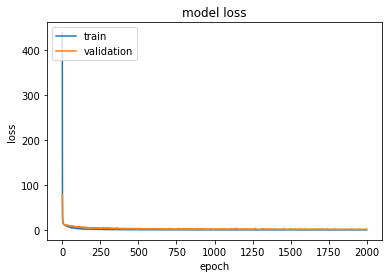

In [91]:
# import keras
import keras as kr

# Create a new neural network
m = kr.models.Sequential()

# Add a hidden layer with 128 neurons and an input layer with 13
m.add(kr.layers.Dense(128, input_dim=13, activation="relu"))
# Add a hidden layer with 64 neurons
m.add(kr.layers.Dense(64, activation="relu"))
# Add a one neuron output layer
m.add(kr.layers.Dense(1, activation="linear"))

# Compile the model
m.compile(loss="mean_squared_error", optimizer="adam", metrics=['mean_absolute_percentage_error'])

# Train the model
#history = m.fit(inputs_scale_train, output_train, epochs=2000, batch_size=10)
history = m.fit(inputs_scale, output, epochs=2000, batch_size=10)

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [92]:
# predicted outputs of neural network
np.round(m.predict(inputs_scale).T)

array([[24., 22., 35., 33., 36., 29., 23., 27., 16., 19., 16., 19., 22.,
        20., 18., 20., 23., 18., 20., 18., 13., 20., 15., 14., 15., 14.,
        17., 15., 19., 21., 13., 15., 13., 13., 14., 19., 20., 21., 25.,
        31., 35., 26., 25., 25., 21., 19., 20., 17., 14., 19., 20., 20.,
        25., 23., 19., 35., 25., 31., 23., 20., 19., 16., 23., 25., 33.,
        24., 19., 22., 18., 21., 24., 22., 23., 23., 24., 22., 20., 21.,
        22., 21., 28., 24., 25., 23., 24., 27., 23., 22., 24., 29., 23.,
        22., 23., 25., 20., 28., 22., 39., 43., 34., 28., 27., 19., 20.,
        20., 19., 20., 21., 20., 20., 22., 23., 19., 19., 19., 18., 21.,
        19., 20., 19., 22., 20., 20., 17., 18., 21., 16., 16., 18., 14.,
        20., 20., 23., 18., 16., 18., 17., 18., 14., 18., 14., 14., 14.,
        15., 11., 13., 16., 14., 18., 15., 21., 20., 15., 19., 17., 16.,
        12., 41., 24., 23., 27., 50., 50., 50., 22., 25., 50., 23., 24.,
        22., 17., 19., 22., 24., 22., 30., 24., 24.

In [93]:
# evaluate the model
m.evaluate(inputs_scale, output)

506/506 [==============================] - 0s 704us/step


[0.1092081197607423, 1.2632014751434326]

In [94]:
# calculate how many of the predictions are correct
(np.round(m.predict(inputs_scale).T) == np.round(output.as_matrix())).sum()

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


384

In [89]:
# actual outputs for median_value
np.round(output.as_matrix())

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([24., 22., 35., 33., 36., 29., 23., 27., 16., 19., 15., 19., 22.,
       20., 18., 20., 23., 18., 20., 18., 14., 20., 15., 14., 16., 14.,
       17., 15., 18., 21., 13., 14., 13., 13., 14., 19., 20., 21., 25.,
       31., 35., 27., 25., 25., 21., 19., 20., 17., 14., 19., 20., 20.,
       25., 23., 19., 35., 25., 32., 23., 20., 19., 16., 22., 25., 33.,
       24., 19., 22., 17., 21., 24., 22., 23., 23., 24., 21., 20., 21.,
       21., 20., 28., 24., 25., 23., 24., 27., 22., 22., 24., 29., 23.,
       22., 23., 25., 21., 28., 21., 39., 44., 33., 28., 26., 19., 19.,
       20., 20., 20., 20., 20., 19., 22., 23., 19., 19., 18., 18., 21.,
       19., 20., 19., 22., 20., 20., 17., 19., 21., 16., 16., 18., 14.,
       19., 20., 23., 18., 16., 18., 17., 17., 13., 18., 14., 14., 13.,
       16., 12., 14., 16., 15., 18., 15., 22., 20., 15., 19., 17., 16.,
       13., 41., 24., 23., 27., 50., 50., 50., 23., 25., 50., 24., 24.,
       22., 17., 19., 23., 24., 23., 29., 23., 25., 30., 37., 40

In [90]:
# calculate the mean squared error which is the difference between the neural network prediction 
# and the actual outputs
np.sqrt(np.sum(m.predict(inputs_scale).T - output.as_matrix())**2)

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


4.741195774078383

## Conclusion

- The neural network did not perform as well when I split the data into training and test data.
- Standardization improved the performance of the neural network. This makes sense as a neural network prefers data that is   normally distributed.
- 'relu' activation performed the best on the hidden layers. I tried sigma, tanh and linear also.
- Increasing the epochs to 2000 improved the performance of the neural network.

# References

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

http://www.datasciencemadesimple.com/descriptive-summary-statistics-python-pandas/

https://keras.io/

https://www.tensorflow.org/

http://prisoft.com/data-analysis-in-python-using-the-boston-housing-dataset/

https://gogul.dev/software/regression-example-boston-housing-prices

https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/




